In [ ]:
dict(
    author="Rob Stenson",
    title="Shapes",
    date="11/29/2022"
)

In [1]:
#hide-publish
%pip install -q coldtype[notebook]
#%pip install -q "coldtype[notebook] @ git+https://github.com/goodhertz/coldtype"
from coldtype.notebook import *

Let’s start with a classic rectangle.


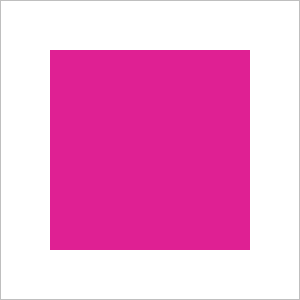

In [2]:
@renderable((300, 300))
def rectangle(r):
    return P().rect(r.inset(50)).f(hsl(0.9, 0.75))

That’s how to draw a rectangle with a 50px padding around the edges (the padding comes from the ``r.inset(50)`` call).

_I’m re-reading this now and if you’re thinking to yourself: that’s a square — well that makes sense, but a square’s just a rectangle with the same width & height._

How about an oval?


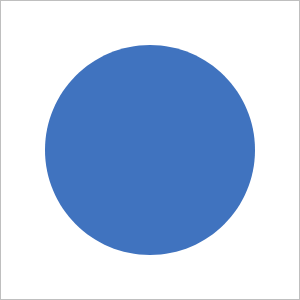

In [3]:
@renderable((300, 300))
def oval(r):
    return P().oval(r.inset(45)).f(hsl(0.6))

That’s an oval. Sweeet.

What if you want to combine an oval and a rect?


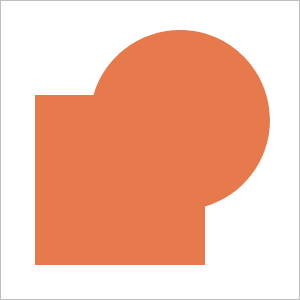

In [4]:
@renderable((300, 300))
def ovalrect(r):
    return (P()
        .oval(r.inset(60))
        .translate(30, 30)
        .union(P()
            .rect(r.inset(65))
            .translate(-30, -30))
        .f(hsl(0.05, l=0.6, s=0.75)))

Or maybe you want just the parts of those two shapes that don’t overlap? And maybe you want to fill the shape with a gradient and rotate the rect a little bit and then eyeball how it should be centered in its frame?


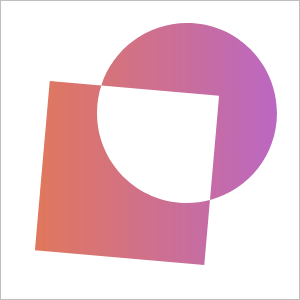

In [5]:
@renderable((300, 300))
def ovalrect_diff(r):
    return (P()
        .oval(r.inset(60))
        .translate(30, 30)
        .xor(P()
            .rect(r.inset(65))
            .translate(-30, -30)
            .rotate(-5))
        .f(Gradient.Horizontal(r,
            hsl(0.05, l=0.6, s=0.75),
            hsl(0.8, l=0.6, s=0.5)))
        .translate(7)) # & eyeball it

## Modifying Shapes

Here’s an example of building up a chain of effects to modify a simple vector shape.


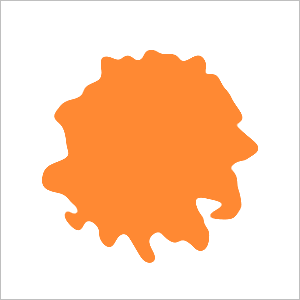

In [4]:
from coldtype.fx.skia import phototype

@renderable((300, 300))
def ovalmod(r):
    return (P()
        .oval(r.inset(60))
        .flatten(5) # breaks the oval down into non-curves, 5 is the length of the segment
        .roughen(50) # randomizes the vertices of the shape
        .f(1)
        .ch(phototype(r, blur=5, cut=100, cutw=5, fill=hsl(0.07, 1, 0.6))))